In [1]:
import pandas as pd
import numpy as np
 

In [2]:
# Step 1: Load the 6.3M rows
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Step 2: Check for missing values  
print(df.isnull().sum()) 


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [9]:
# for understanding target veriable
# how many no of frauds
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
# calculate fraud percentage
fraud_percentage=(df['isFraud'].sum() / len(df))*100
fraud_percentage

0.12908204481801522

In [11]:
# transaction Type distribution
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
 # difference between old and new balance
(df['oldbalanceOrg']-df['amount']-df['newbalanceOrig'] ).head() 
 


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

# Data cleaning and feature understanding

In [14]:
# understanding feature types and separate columns types

numerical_cols = [
    'step', 'amount',
    'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest'
]

categorical_cols = ['type']

identifier_cols = ['nameOrig', 'nameDest']

target_col = 'isFraud'


In [15]:
# check again null value
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



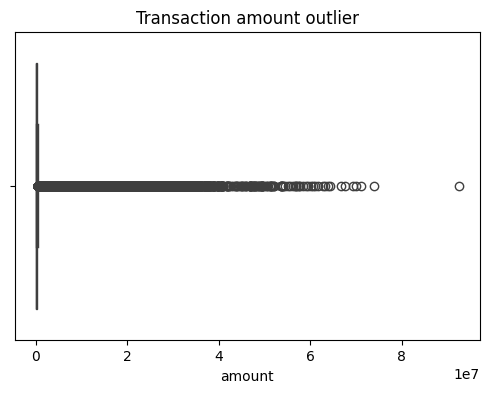

In [17]:
# outlier detection
plt.figure(figsize=(6,4))
sns.boxplot(x=df['amount'])
plt.title('Transaction amount outlier')
plt.show()

In [18]:
# balance based feature check
df['balance_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']


In [19]:
df[['balance_diff_orig','balance_diff_dest']].head()

,balance_diff_orig,balance_diff_dest
0,1.455192e-11,-9839.64
1,-1.136868e-12,-1864.28
2,0.000000e+00,-181.00
3,0.000000e+00,-21363.00
4,0.000000e+00,-11668.14


In [20]:
df[['balance_diff_orig','balance_diff_dest']].describe()

,balance_diff_orig,balance_diff_dest
count,6.362620e+06,6.362620e+06
mean,-2.010925e+05,-5.556717e+04
std,6.066505e+05,4.415288e+05
min,-9.244552e+07,-1.319123e+07
25%,-2.496411e+05,-2.935305e+04
50%,-6.867726e+04,-3.500490e+03
75%,-2.954230e+03,0.000000e+00
max,1.000000e-02,7.588573e+07


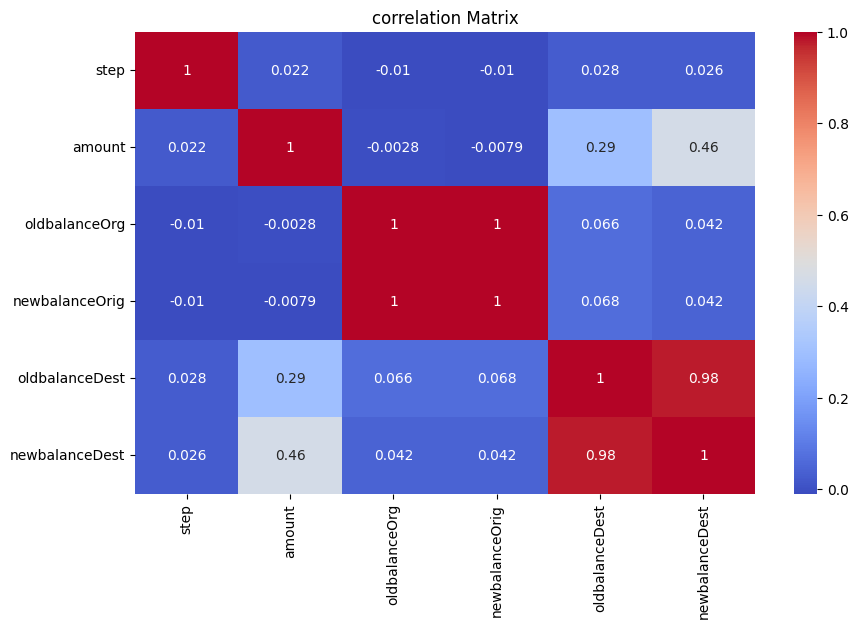

In [21]:
# Multicollinearity
# correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='coolwarm')
plt.title("correlation Matrix")
plt.show()

# feature engineering 

In [22]:
# create Useful feature 
df['orig_balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']


In [23]:
# remove identifier columns
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)


In [24]:
# remove redundant Feature
df.drop(columns=['oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest'],inplace=True)

In [25]:
# check isflaggedFraud  column
df['isFlaggedFraud'].value_counts()


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

# Data Preparation for Machine Learning

In [26]:
# encoding categorical Variable
df=pd.get_dummies(df,columns=['type'],drop_first=True)

In [27]:
# separate feature target
x=df.drop(columns=['isFraud'])
y=df['isFraud']


In [28]:
X=x

# train test split

In [29]:
# data distribution in test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [30]:
# now we will class based because fraud are less than 1%
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {0: class_weights[0], 1: class_weights[1]}
 


In [31]:
class_weights

{0: 0.5006462331542675, 1: 387.35727952687427}

# feature scaling

In [32]:
# standardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [33]:
X_train_scaled.shape

(4453834, 11)

In [34]:
X_test_scaled.shape

(1908786, 11)

In [35]:
y_train.value_counts()

isFraud
0    4448085
1       5749
Name: count, dtype: int64

# model building

In [36]:
# import required library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
classification_report,confusion_matrix,
roc_auc_score,
roc_curve)

In [37]:
# train the logistic Regression
log_model=LogisticRegression(max_iter=1000,class_weight=class_weights,n_jobs=-1)
log_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight={0: 0.5006462331542675, 1: 387.35727952687427},
                   max_iter=1000, n_jobs=-1)

In [38]:
# make prediction
y_pred=log_model.predict(X_test_scaled)
y_pred_proba=log_model.predict_proba(X_test_scaled)[:,1]

In [39]:
y_pred


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [40]:
y_pred_proba

array([1.71134972e-10, 7.42159801e-11, 2.05259304e-10, ...,
       4.87056061e-02, 7.77218133e-01, 1.10925198e-04])

# confusion matrixs

In [41]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1802036  104286]
 [     58    2406]]


In [42]:
c_report=classification_report(y_test,y_pred)

In [43]:
print(c_report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.98      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.96      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [44]:
roc_auc=roc_auc_score(y_test,y_pred_proba)

In [45]:
print(roc_auc)

0.9933154517548084


# roc_curve

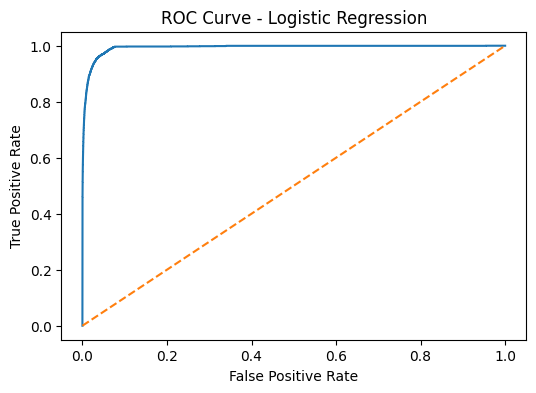

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()


# random forest intution

In [47]:
# from sklearn.ensemble import RandomForestClassifier
 
# rf_model = RandomForestClassifier(
#     n_estimators=100,     # reduce trees
#     max_depth=8,          # shallower trees
#     min_samples_leaf=50,  # reduce splits
#     class_weight=class_weights,
#     n_jobs=1,             # VERY IMPORTANT
#     random_state=42
# )

# rf_model.fit(X_train, y_trai

In [48]:
# # evaluate Random Forest
# y_pred_rf=rf_model.predict(X_test)
# y_pred_rf_proba=rf_model.predict_proba(X_test)[:,1]

In [49]:
# print(classification_report(y_test,y_pred_rf)

In [50]:
# roc_auc_rf=roc_auc_score(y_test,y_pred_rf_proba)
# print(roc_auc_rf)

In [58]:
 #  SAVE MODEL
import os
import joblib

os.makedirs("models", exist_ok=True)

joblib.dump(log_model, "models/logistic_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

In [55]:
import joblib

# Save the trained model
joblib.dump(log_model, "../models/logistic_model.pkl")

# Save the scaler
joblib.dump(scaler, "../models/scaler.pkl")


['../models/scaler.pkl']

In [56]:
import glob

# List all .pkl files in the models folder
print(glob.glob("../models/*.pkl"))


['../models\\logistic_model.pkl', '../models\\scaler.pkl']


In [57]:
# Load the saved model
log_model = joblib.load("../models/logistic_model.pkl")

# Load the saved scaler
scaler = joblib.load("../models/scaler.pkl")


# Gradient Boosting

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier 
# gb_model = GradientBoostingClassifier(
#     n_estimators=100,
#     learning_rate=0.1, 
#     max_depth=5,
#     random_state=42
# )

# gb_model.fit(X_train,y_train)

In [ ]:
# y_pred_gb=gb_model.predict(X_test)
# y_pred_gb_proba=gb_model.predict_proba(X_test)[:,1]

In [ ]:
# print(classification_report(y_test,y_pred_gb))


In [ ]:
# roc_auc_rf=roc_auc_score(y_test,y_pred_gb_proba)
# print(roc_auc_gb)